In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input direct
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

# Importing Libraries and Upoading Data 

In [2]:
import os
import time
import random
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
%matplotlib inline
plt.style.use('ggplot')

In [3]:
labels=["NORMAL","PNEUMONIA"]
img_size = (128,128)
# define a function to get the images from data directory
def get_data(data_dir):
    images=[]
    img_labels=[]
    for label in labels:
#         train/PNEUMONIA
        path = os.path.join(data_dir, label)
        class_labels = labels.index(label)
        for img_name in os.listdir(path):
            
            # Skip non-image files like `.DS_Store`
            if not img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"Skipping non-image file: {path}")
                continue
            try:
                img_arr = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size))
                images.append(resized_arr),img_labels.append(class_labels)
            except Exception as e:
                print(e)
    return np.array(images),np.array(img_labels)

In [4]:
train_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/test"
val_dir="/kaggle/input/chest-xray-pneumonia/chest_xray/val"

In [5]:
train_imgs,train_labels=get_data(train_dir)
test_imgs,test_labels=get_data(test_dir)
val_imgs,val_labels=get_data(val_dir)

In [6]:
# Check shapes
print("Train images shape:", train_imgs.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_imgs.shape)
print("Test labels shape:", test_labels.shape)
print("Validation images shape:", val_imgs.shape)
print("Validation labels shape:", val_labels.shape)

Train images shape: (5216, 128, 128)
Train labels shape: (5216,)
Test images shape: (624, 128, 128)
Test labels shape: (624,)
Validation images shape: (16, 128, 128)
Validation labels shape: (16,)


# Visualizing the pneumonia and normal image

Number of pneumonia images: 3875


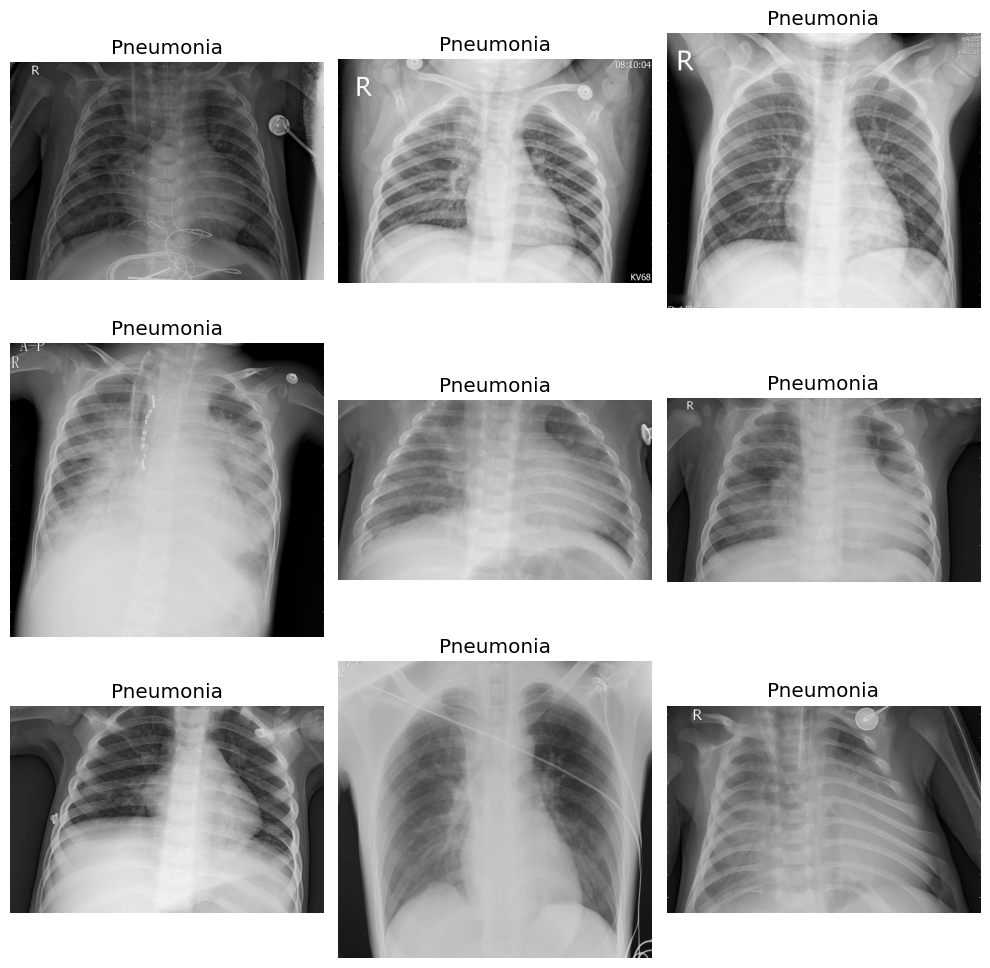

In [7]:
pneumonia_path = os.path.join(train_dir,"PNEUMONIA")
pneumonia_images = [] 
for img_name in os.listdir(pneumonia_path):
    # Construct the full path to each image
    img_path = os.path.join(pneumonia_path, img_name)
     # Load the image in grayscale
    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    pneumonia_images.append(img_arr)  # Add the path to the list

# Output the number of pneumonia images and sample paths
print(f"Number of pneumonia images: {len(pneumonia_images)}")
# Visualize a few pneumonia images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(pneumonia_images[i], cmap='gray')
    plt.title("Pneumonia")
    plt.axis('off')
plt.tight_layout()
plt.show()

Number of normal images: 1341


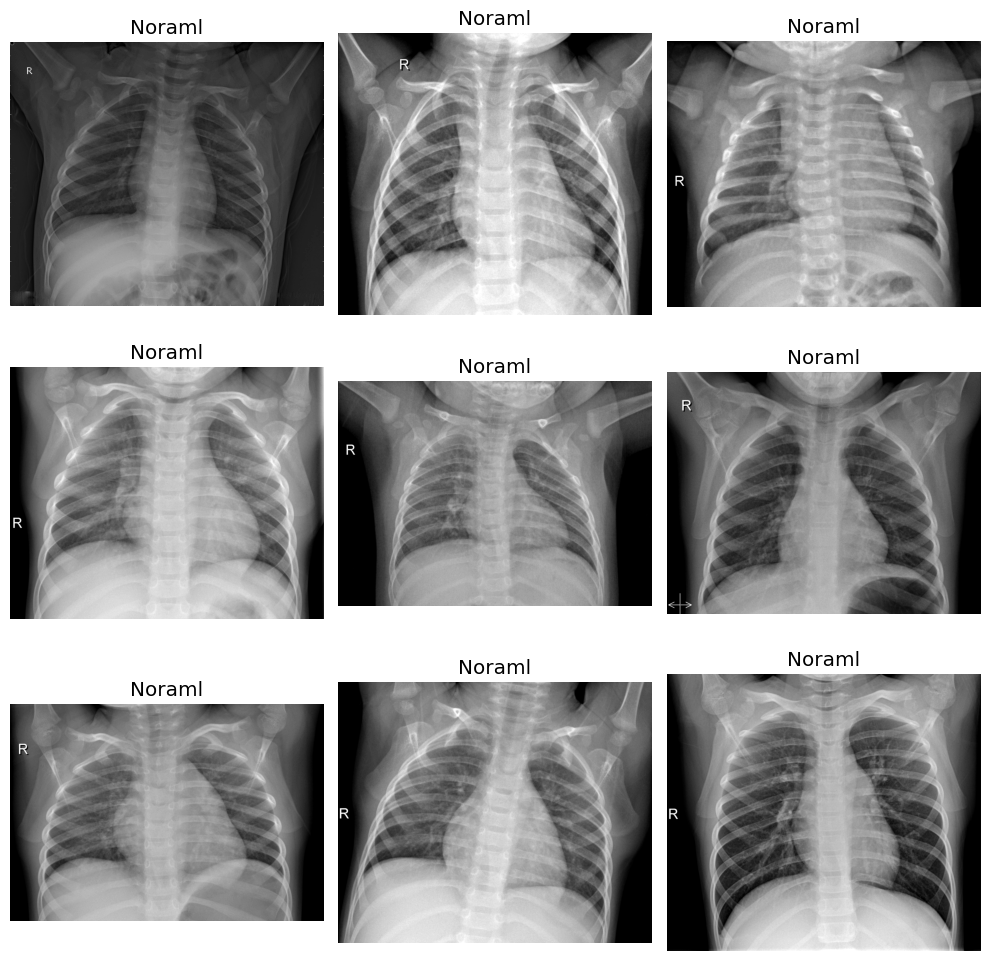

In [8]:
normal_path = os.path.join(train_dir,"NORMAL")
normal_images = [] 
for img_name in os.listdir(normal_path):
    # Construct the full path to each image
    img_path = os.path.join(normal_path, img_name)
     # Load the image in grayscale
    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    normal_images.append(img_arr)  # Add the path to the list

# Output the number of pneumonia images and sample paths
print(f"Number of normal images: {len(normal_images)}")
# Visualize a few normal images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(normal_images[i], cmap='gray')
    plt.title("Noraml")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Count plot for pneumonia and normal images

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


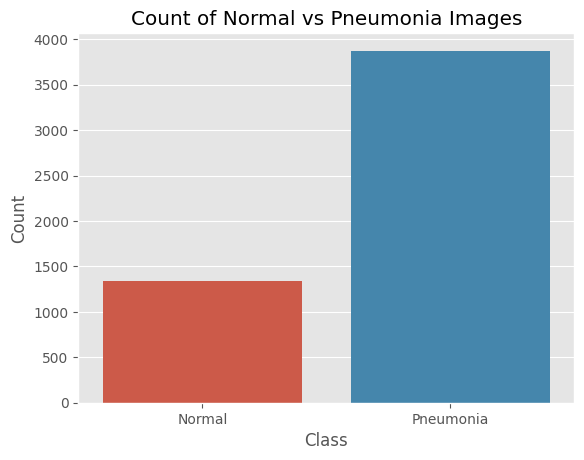

In [9]:
# Count the number of images in each category
normal_count = len(normal_images)
pneumonia_count = len(pneumonia_images)

# Create a list of categories corresponding to each image
categories = ['Normal'] * normal_count + ['Pneumonia'] * pneumonia_count

# Create a countplot
sns.countplot(x=categories)
plt.title('Count of Normal vs Pneumonia Images')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Data Augmentation & Resizing

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [11]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s=int (sec_elapsed % 60)
    return f"{h}:{m}:{s}"

In [12]:
start_time=time.time()
def augmented_data(file_dir, n_generated_samples, save_to_dir):
    data_gen = ImageDataGenerator(rotation_range=10, 
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' 
        i=0
        for batch in data_gen.flow(x = image, batch_size = 32, save_to_dir = augmented_data_path, save_prefix = save_prefix, save_format = "jpeg"):
            i+=1
            if i>n_generated_samples:
                break
end_time=time.time()
execution_time=end_time-start_time

In [13]:
NORMAL_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL'

if not os.path.isdir('/kaggle/working/augmented_data/'):
    augmented_data_path = '/kaggle/working/augmented_data/'
    os.mkdir(augmented_data_path)

augmented_data(file_dir =NORMAL_dir, n_generated_samples=2, save_to_dir=augmented_data_path+"NORMAL")
print(timing(execution_time))

0:0:0


Number of normal images: 3321


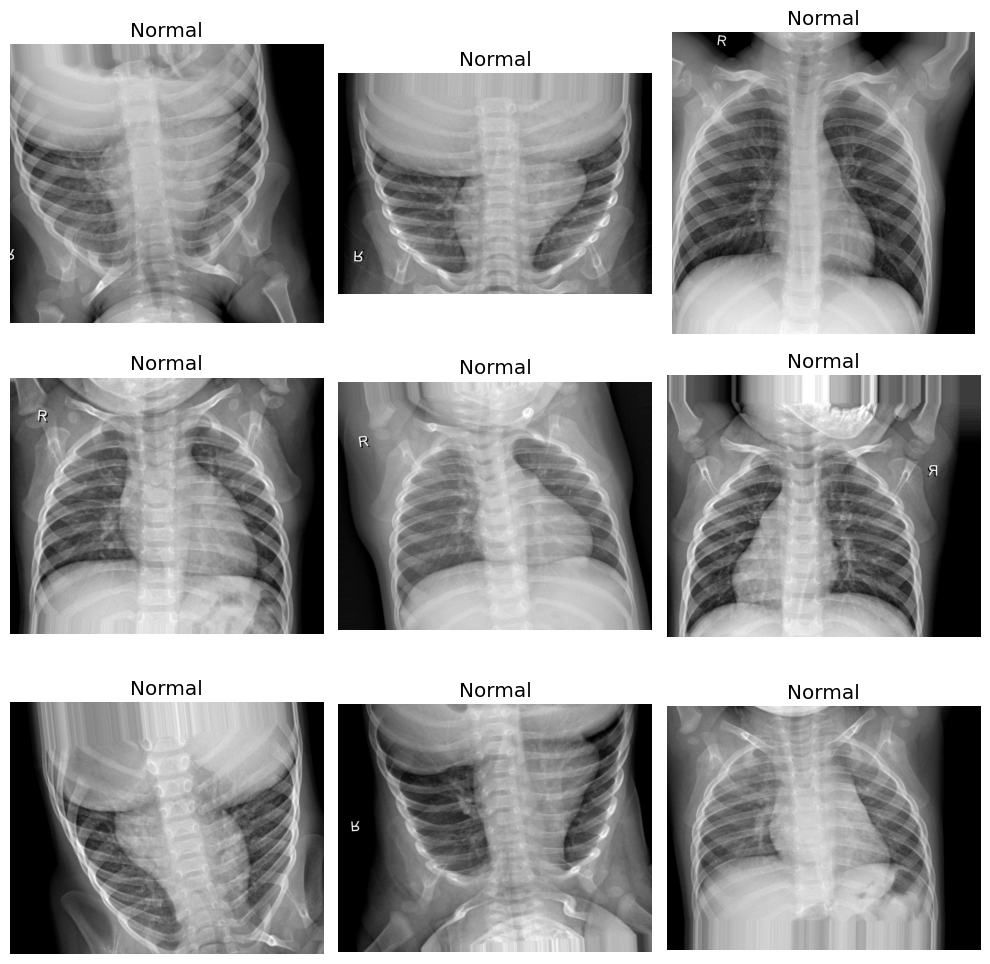

In [14]:
# visualize the normal generated images
normal_path = os.path.join(augmented_data_path,"NORMAL")
normal_images = [] 

for img in os.listdir(augmented_data_path):
    # Construct the full path to each image
    img_path = os.path.join(augmented_data_path, img)
     # Load the image in grayscale
    img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    normal_images.append(img_arr)  # Add the path to the list

# Output the number of pneumonia images and sample paths
print(f"Number of normal images: {len(normal_images)}")
# Visualize a few normal images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(normal_images[i], cmap='gray')
    plt.title("Normal")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Define paths
pneumonia_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'  # Pneumonia imag
normal_dir = '/kaggle/working/augmented_data/'  # Generated normal images
print(len(os.listdir(normal_dir)))
print(len(os.listdir(pneumonia_dir)))

3321
3875


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


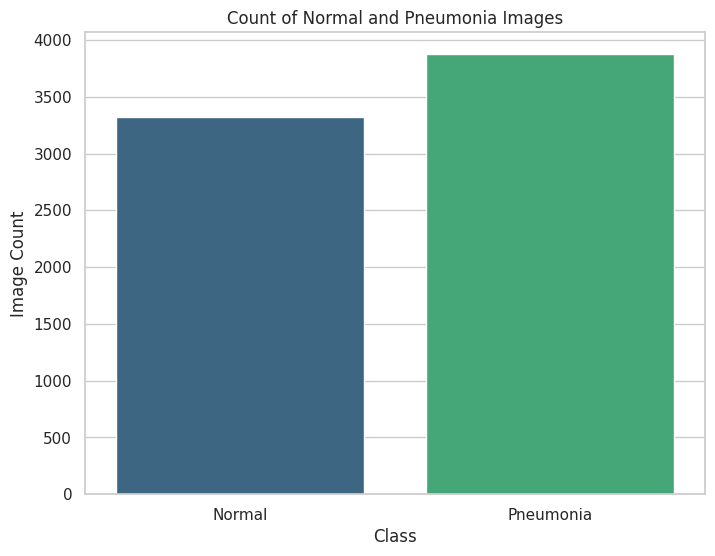

In [16]:
# Count the number of images in each class

data_counts = {
    'Class': ['Normal', 'Pneumonia'],
    'Count': [len(os.listdir(normal_dir)), len(os.listdir(pneumonia_dir))]
}

# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x='Class', y='Count', data=data_counts, palette="viridis")

plt.title('Count of Normal and Pneumonia Images')
plt.ylabel('Image Count')
plt.xlabel('Class')
plt.show()

# Data splitting

In [17]:
# making the train,test and valis directories
if not os.path.isdir('chest_xray'):
    base_dir = 'chest_xray'
    os.mkdir(base_dir)
if not os.path.isdir('chest_xray/train'):
    train_dir = os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('chest_xray/test'):
    test_dir = os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('chest_xray/valid'):
    valid_dir = os.path.join(base_dir , 'valid')
    os.mkdir(valid_dir)

In [18]:
# making the normal directory in train,test and valid folder
if not os.path.isdir('chest_xray/train/NORMAL'):
    normal_train_dir = os.path.join(train_dir, 'NORMAL')
    os.mkdir(normal_train_dir)
if not os.path.isdir('chest_xray/test/NORMAL'):
    normal_test_dir = os.path.join(test_dir, 'NORMAL')
    os.mkdir(normal_test_dir)
if not os.path.isdir('chest_xray/valid/NORMAL'):
    normal_valid_dir = os.path.join(valid_dir, 'NORMAL')
    os.mkdir(normal_valid_dir)

In [19]:
# making the pneumonia directory in train,test and valid folder
if not os.path.isdir('chest_xray/train/PNEUMONIA'):
    pneumonia_train_dir = os.path.join(train_dir, 'PNEUMONIA')
    os.mkdir(pneumonia_train_dir)
if not os.path.isdir('chest_xray/test/PNEUMONIA'):
    pneumonia_test_dir = os.path.join(test_dir, 'PNEUMONIA')
    os.mkdir(pneumonia_test_dir)
if not os.path.isdir('chest_xray/valid/PNEUMONIA'):
    pneumonia_valid_dir = os.path.join(valid_dir, 'PNEUMONIA')
    os.mkdir(pneumonia_valid_dir)

In [20]:
# Define paths
pneumonia_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'  # Pneumonia imag
normal_dir = '/kaggle/working/augmented_data/'  # Generated normal images
print(len(os.listdir(normal_dir)))
print(len(os.listdir(pneumonia_dir)))

3321
3875


In [21]:
files = os.listdir('/kaggle/working/augmented_data/')
fnames = []
for i in range(0,2330):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(normal_dir, fname)
    dst = os.path.join(normal_train_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
files = os.listdir('/kaggle/working/augmented_data/')
fnames = []
for i in range(2330,2662):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(normal_dir, fname)
    dst = os.path.join(normal_valid_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
files = os.listdir('/kaggle/working/augmented_data/')
fnames = []
for i in range(2662,3301):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(normal_dir, fname)
    dst = os.path.join(normal_test_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
files = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA')
fnames = []
for i in range(0,2712):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(pneumonia_dir, fname)
    dst = os.path.join(pneumonia_train_dir, fname)
    shutil.copyfile(src, dst)

In [25]:
files = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA')
fnames = []
for i in range(2712,3487):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(pneumonia_dir, fname)
    dst = os.path.join(pneumonia_test_dir, fname)
    shutil.copyfile(src, dst)

In [26]:
files = os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA')
fnames = []
for i in range(3487,3875):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(pneumonia_dir, fname)
    dst = os.path.join(pneumonia_valid_dir, fname)
    shutil.copyfile(src, dst)

In [27]:
# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
# Define directories
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [29]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    shuffle=True,
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class problems
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    shuffle=True,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False ,
    seed=42,
    color_mode="rgb"# Shuffle should be False for evaluation or prediction
)

print("Data generators created successfully!")

Found 5042 images belonging to 2 classes.
Found 720 images belonging to 2 classes.
Found 1414 images belonging to 2 classes.
Data generators created successfully!


In [30]:
class_labels = train_generator.class_indices
class_labels

{'NORMAL': 0, 'PNEUMONIA': 1}

In [31]:
class_names={value:key for (key,value) in class_labels.items()}
class_names

{0: 'NORMAL', 1: 'PNEUMONIA'}

# VGG19 CNN Architecture

In [32]:
base_model=VGG19(input_shape=(128,128,3),
                 include_top=False,
                 weights="imagenet")
for layer in base_model.layers:
    if layer.name in ['block5_conv2','block5_conv3','block5_conv4']:
        layer.trainable= True
    else:
         layer.trainable=False

x=base_model.output
flat=Flatten()(x)

class_1=Dense(4608,activation="relu")(flat)
dropout=Dropout(0.2)(class_1)
class_2=Dense(1152,activation="relu")(dropout)
output=Dense(2,activation="softmax")(class_2)
model=Model(base_model.inputs,output)
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 50,144,642 (191.29 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

In [33]:
file_path = "model.keras"
es = EarlyStopping(monitor="val_loss", verbose=1, mode="min", patience=4)
lrr=ReduceLROnPlateau(monitor="val_accuracy",patience=3,verbose=1,factor=0.5,min_lr="0.0001")
cp=ModelCheckpoint(file_path,monitor="val_loss",save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
optimizer = Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

# Model training

In [34]:
# 1. First clear the session
tf.keras.backend.clear_session()

In [35]:
batch_size=32
train_steps=int(len(train_generator)//batch_size)
val_steps=int(len(valid_generator)//batch_size)


In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps, 
    epochs=10,
    callbacks=[es, cp, lrr],
    validation_data=valid_generator,
    validation_steps=val_steps,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.3969 - loss: 1.8981 - val_accuracy: 0.5389 - val_loss: 1.5431 - learning_rate: 1.0000e-04
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5969 - loss: 1.2085 - val_accuracy: 0.8069 - val_loss: 0.5136 - learning_rate: 1.0000e-04
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7427 - loss: 0.5352 - val_accuracy: 0.5014 - val_loss: 0.5697 - learning_rate: 1.0000e-04
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7500 - loss: 0.4245 - val_accuracy: 0.8333 - val_loss: 0.2958 - learning_rate: 1.0000e-04
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8365 - loss: 0.2783 - val_accuracy: 0.9528 - val_loss: 0.1413 - learning_rate: 1.0000e-04
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9292 - loss: 0.1735 - val_accuracy: 0.9458 - val_loss: 0.1286 - learning_rate: 1.0000e-04
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8969 - loss: 0.2430 - val_accuracy: 0.9611 

In [37]:
if not os.path.isdir('model_weights/'):
    os.mkdir("model_weights/")
model.save_weights(filepath = "model_weights/vgg19_model.weights.h5", overwrite=True)

# Evaluate the model


In [38]:
model.load_weights("model_weights/vgg19_model.weights.h5")

vgg_val_eval = model.evaluate(valid_generator)
vgg_test_eval = model.evaluate(test_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.9591 - loss: 0.0955
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 282ms/step - accuracy: 0.9670 - loss: 0.1027


In [39]:
print(f"Validation Loss: {vgg_val_eval[0]}")
print(f"Validation Accuarcy: {vgg_val_eval[1]}")
print(f"Test Loss: {vgg_test_eval[0]}")
print(f"Test Accuarcy: {vgg_test_eval[1]}")

Validation Loss: 0.0762866735458374
Validation Accuarcy: 0.9750000238418579
Test Loss: 0.12615138292312622
Test Accuarcy: 0.9519094824790955


# visualize the accuracy and loss plots 

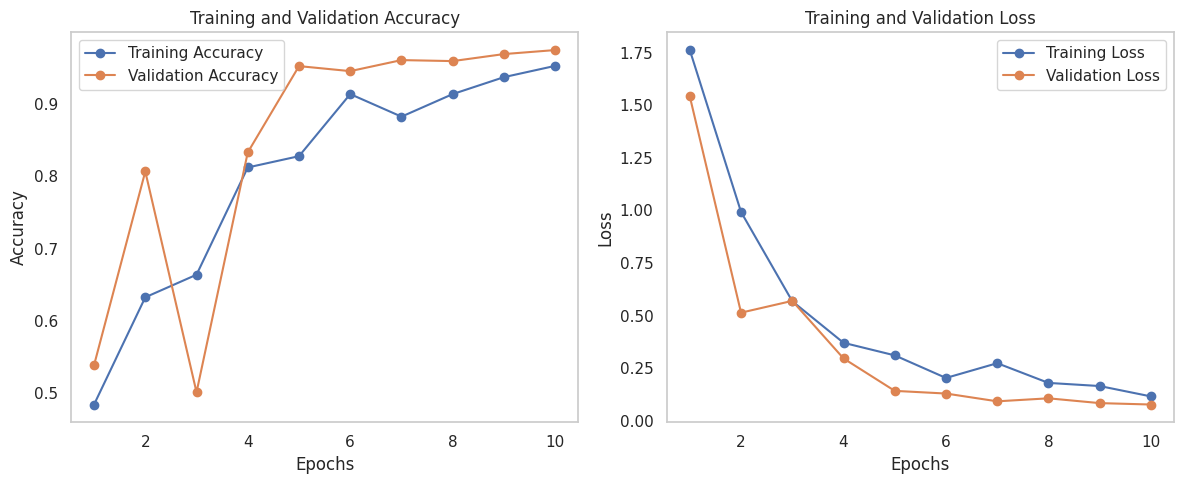

In [40]:
# Extract accuracy and loss
acc = history.history['accuracy']  # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Number of epochs
epochs = range(1, len(acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

# Increamental unfreezing and fine tuning

In [41]:
base_model=VGG19(include_top=False,input_shape=(128,128,3))
base_model_layer_names=[layer.name for layer in base_model.layers]
base_model_layer_names

['input_layer',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool']

In [42]:
base_model=VGG19(include_top=False,input_shape=(128,128,3))
base_model_layer_nmaes=[layer.name for layer in base_model.layers]

x=base_model.output
flat=Flatten()(x)
class_1=Dense(4608,activation="relu")(flat)
drop_out1=Dropout(0.2)(class_1)
class_2=Dense(1152,activation="relu")(drop_out1)
output=Dense(2,activation="softmax")(class_2)

model_02=Model(base_model.inputs,output)

for layer in base_model.layers:
    if layer.name in ['block5_conv2','block5_conv3','block5_conv4']:
        layer.trainable= True
    else:
         layer.trainable=False

print(model_02.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 50,144,642 (191.29 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

None


In [43]:
early_stopping = EarlyStopping(
    monitor='val_loss',          # Metric to monitor
    patience=5,                  # Number of epochs with no improvement to wait
    restore_best_weights=True    # Restore the best model weights
)
optimizer = Adam(learning_rate=0.0001)
model_02.compile(loss="categorical_crossentropy", optimizer = optimizer, metrics=['accuracy'])
history_02 = model_02.fit(train_generator, steps_per_epoch=train_steps, epochs = 5,callbacks= [early_stopping],validation_data=valid_generator,validation_steps=val_steps)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5865 - loss: 1.1444 - val_accuracy: 0.7764 - val_loss: 0.5652
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.7604 - loss: 0.4832 - val_accuracy: 0.6111 - val_loss: 0.5421
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8115 - loss: 0.3896 - val_accuracy: 0.8528 - val_loss: 0.2920
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8521 - loss: 0.2803 - val_accuracy: 0.8694 - val_loss: 0.3698
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8385 - loss: 0.3300 - val_accuracy: 0.8847 - val_loss: 0.3151


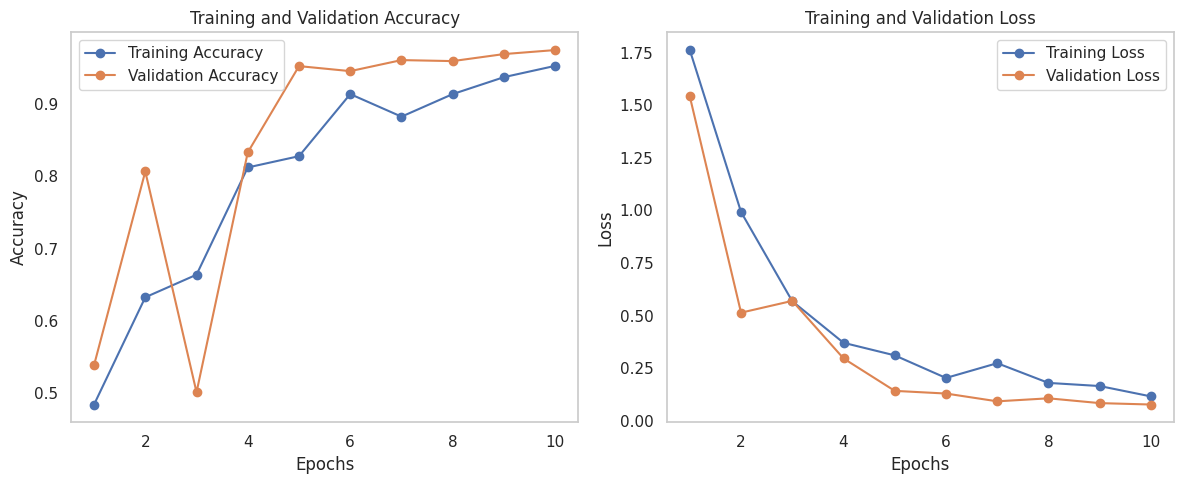

In [44]:
# visualize the accuracy and loss plots 

# Extract accuracy and loss
acc = history.history['accuracy']  # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

# Number of epochs
epochs = range(1, len(acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

In [45]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02.save_weights(filepath="model_weights/vgg19_model_02.weights.h5", overwrite=True)

In [46]:
model_02.load_weights("model_weights/vgg19_model_02.weights.h5")
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.8561 - loss: 0.2853
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.6978 - loss: 0.5907


In [47]:
print(f"Validation Loss: {vgg_val_eval_02[0]}")
print(f"Validation Accuarcy: {vgg_val_eval_02[1]}")
print(f"Test Loss: {vgg_val_eval_02[0]}")
print(f"Test Accuarcy: {vgg_val_eval_02[1]}")

Validation Loss: 0.29201701283454895
Validation Accuarcy: 0.8527777791023254
Test Loss: 0.29201701283454895
Test Accuarcy: 0.8527777791023254


45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step
y_true shape: (1414,)
y_pred shape: (1414,)
Classification Report:
{'NORMAL': {'precision': 1.0, 'recall': 0.6259780907668232, 'f1-score': 0.7699711260827719, 'support': 639}, 'PNEUMONIA': {'precision': 0.7642998027613412, 'recall': 1.0, 'f1-score': 0.8664058133035215, 'support': 775}, 'accuracy': 0.830975954738331, 'macro avg': {'precision': 0.8821499013806706, 'recall': 0.8129890453834117, 'f1-score': 0.8181884696931467, 'support': 1414}, 'weighted avg': {'precision': 0.8708149555445823, 'recall': 0.830975954738331, 'f1-score': 0.8228260642695334, 'support': 1414}}


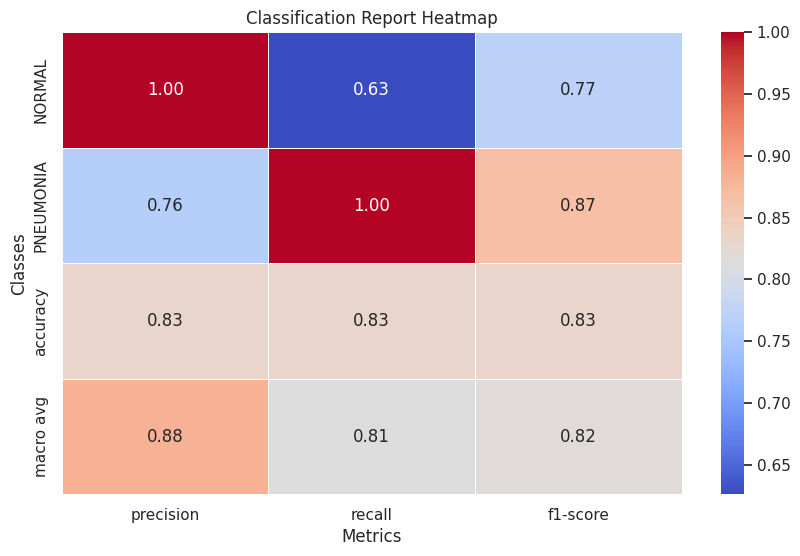

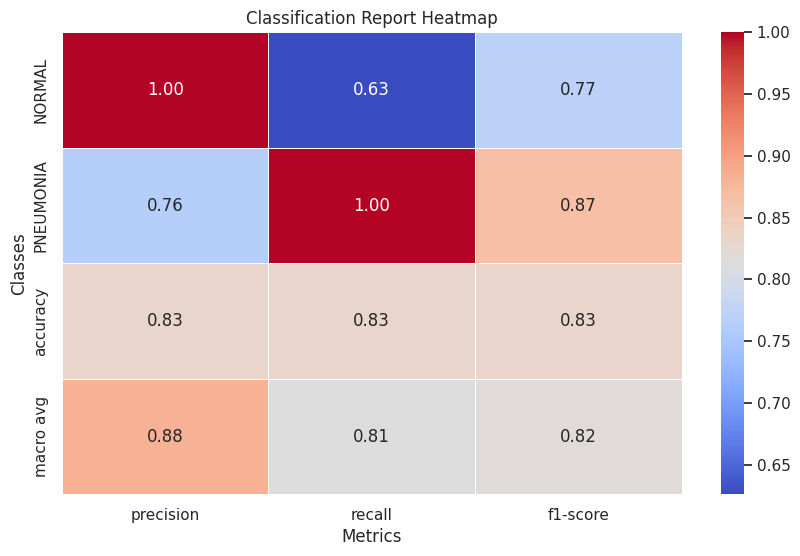

In [48]:
import numpy as np
from sklearn.metrics import classification_report
y_pred_probs=model_02.predict(test_generator)
# Convert predictions to class indices (single label per sample)
y_pred = np.argmax(y_pred_probs, axis=1)  # From probabilities to class labels

# True labels (already binary)
y_true = test_generator.classes

# Verify shapes
print("y_true shape:", y_true.shape)  # Should be (1414,)
print("y_pred shape:", y_pred.shape)  # Should also be (1414,)

# Class names
class_names = list(test_generator.class_indices.keys())

# Generate classification report
if len(y_true) == len(y_pred):  # Ensure lengths match
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    print("Classification Report:")
    print(report)

    # Visualization (optional)
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Classification Report Heatmap")
    plt.xlabel("Metrics")
    plt.ylabel("Classes")
    plt.show()
else:
    print("Mismatch in lengths of y_true and y_pred. Check data consistency.")

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

# Unfreezing the entire network

In [49]:
# Unfreezing the entire network
base_model = VGG19(include_top=False, input_shape=(128,128,3))
base_model_layer_names = [layer.name for layer in base_model.layers] 
base_model_layer_names

x=base_model.output
flat = Flatten()(x)

class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights('model_weights/vgg19_model_02.weights.h5')

optimizer = Adam(learning_rate=0.0001)
model_03.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=['accuracy'])
model_03.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 63,089,602 (240.67 MB)

 Trainable params: 63,089,602 (240.67 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history_03=model_03.fit(train_generator,steps_per_epoch=train_steps, epochs = 10, callbacks=[es,cp,lrr], validation_data=valid_generator)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5771 - loss: 2.0720 - val_accuracy: 0.5389 - val_loss: 0.7344 - learning_rate: 1.0000e-04
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5823 - loss: 0.7254 - val_accuracy: 0.5389 - val_loss: 0.6752 - learning_rate: 1.0000e-04
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5854 - loss: 0.6783 - val_accuracy: 0.5389 - val_loss: 0.6870 - learning_rate: 1.0000e-04
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5802 - loss: 0.6890 - val_accuracy: 0.4889 - val_loss: 0.6760 - learning_rate: 1.0000e-04
Epoch 4: early stopping


In [51]:
if not os.path.isdir('model_weights/'):
    os.mkdir('model_weights/')
model_02=model_02.save(filepath="model_weights/vgg19_unfrozen.h5", overwrite=True)

In [52]:
# evaluating the model
model_03=load_model("model_weights/vgg19_unfrozen.h5")
model_03_val_eval=model_03.evaluate(valid_generator)
model_03_test_eval=model_03.evaluate(test_generator)

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.8645 - loss: 0.2636
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 215ms/step - accuracy: 0.6978 - loss: 0.5907


# Predictions checking of model

In [53]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_pneumonia(image_path, model,target_size=128*128):
    """
    Function to preprocess an input image and make predictions using a trained model.
    
    Parameters:
    - image_path: str, path to the input chest X-ray image.
    - model: Trained Keras model for pneumonia detection.
    - target_size: tuple, the expected input size for the model (default is 128x128).
    
    Returns:
    - prediction: str, 'Pneumonia' or 'Normal' based on the model's prediction.
    - confidence: float, the confidence score for the predicted class.
    """
    try:
        # Load the image
        image = load_img(image_path, target_size=target_size, color_mode="rgb")
        
        # Convert the image to an array
        image_array = img_to_array(image)
        
        # Normalize pixel values to [0, 1]
        image_array = image_array / 255.0
        
        # Expand dimensions to add batch size
        image_array = np.expand_dims(image_array, axis=0)
        
        
         # Debug prediction output
        prediction = model.predict(image_array)
        print(f"Prediction type: {type(prediction)}")
        print(f"Prediction value: {prediction}")
        print("Prediction output:", {prediction})

    #   # Assuming binary classification (e.g., [Pneumonia, Normal])
        class_idx = np.argmax(prediction, axis=1)[0]
        confidence =prediction[0][class_idx]
        
        
        # Define class labels (modify if needed)
        class_labels = {1: "Pneumonia", 0: "Normal"}
        predicted_label = class_labels[class_idx]
        # Display the image with the predicted label and confidence score
        plt.imshow(load_img(image_path))
        plt.title("Pneumonia_detection")
        plt.axis("off")
        
        return predicted_label, confidence
    except Exception as e:
        return f"Error: {str(e)}"
# Predict on a sample image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction type: <class 'numpy.ndarray'>
Prediction value: [[9.601882e-04 9.990398e-01]]
Prediction shape: (1, 2)


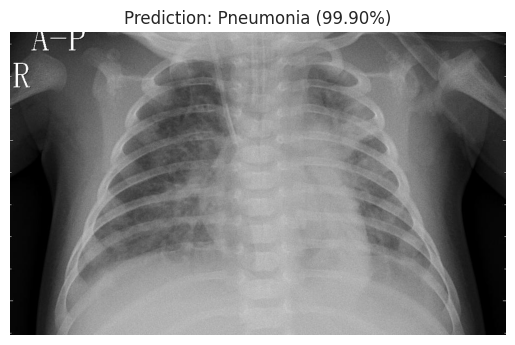

Prediction: Pneumonia
Confidence: 1.00%


In [54]:
# Load your trained model

model=load_model("/kaggle/working/model_weights/vgg19_unfrozen.h5")
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def predict_pneumonia(image_path, model, target_size=(128, 128)):
    """
    Predict whether a chest X-ray image shows Pneumonia or is Normal.
    
    Parameters:
    - image_path: str, path to the chest X-ray image.
    - model: Trained Keras model for pneumonia detection.
    - target_size: tuple, the expected input size for the model (default is 128x128).
    
    Returns:
    - tuple: (predicted_label, confidence_score) or an error message string.
    """
    try:
        # Load and preprocess the image
        image = load_img(image_path, target_size=target_size, color_mode="rgb")
        image_array = img_to_array(image) / 255.0  # Normalize to [0, 1]
        image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

        # Predict using the model
        prediction = model.predict(image_array)
        print(f"Prediction type: {type(prediction)}")
        print(f"Prediction value: {prediction}")
        print(f"Prediction shape: {prediction.shape}")

        # Ensure prediction is a NumPy array and has the correct shape
        if isinstance(prediction, np.ndarray) and prediction.shape == (1, 2):
            # Extract class index
            class_idx = np.argmax(prediction, axis=1)[0]
            confidence = prediction[0][class_idx]  # Probability of the predicted class
        else:
            return "Error: Unexpected prediction output shape"

        # Define class labels
        class_labels = {0: "Normal", 1: "Pneumonia"}
        predicted_label = class_labels[class_idx]

        # Display the image with the predicted label and confidence score
        plt.imshow(load_img(image_path))
        plt.title(f"Prediction: {predicted_label} ({confidence * 100:.2f}%)")
        plt.axis("off")
        plt.show()

        return predicted_label, confidence
    except FileNotFoundError:
        return "Error: Image file not found"
    except Exception as e:
        return f"Error: {str(e)}"

# Load the model and predict on a sample image
model = load_model("/kaggle/working/model_weights/vgg19_unfrozen.h5")
image_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg"
result, confidence = predict_pneumonia(image_path, model)

print(f"Prediction: {result}")
print(f"Confidence: {confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Prediction type: <class 'numpy.ndarray'>
Prediction value: [[0.17858085 0.8214191 ]]
Prediction shape: (1, 2)


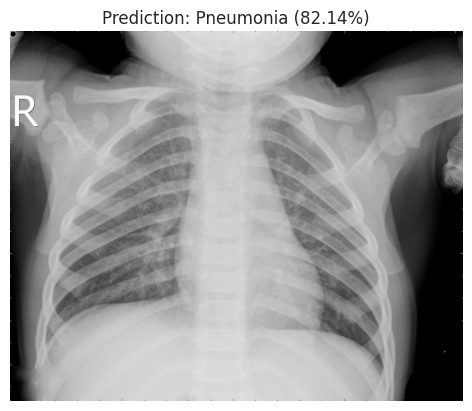

Prediction: Pneumonia
Confidence: 0.82%


In [55]:
# Predict on a sample image
model = load_model("/kaggle/working/model_weights/vgg19_unfrozen.h5")
image_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg"
result, confidence = predict_pneumonia(image_path, model)

print(f"Prediction: {result}")
print(f"Confidence: {confidence:.2f}%")
